# Project: European Soccer Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This European Soccer Database is substracted from [Kaggle](https://www.kaggle.com/hugomathien/soccer), created by Hugo Mathien. This database includes data over 25,000 matches, 10,000 players, from 11 European Countries with their lead championship, across seasons from 2008 to 2016. I will explore the database first in the following <a href="#explore">Data Exploration</a> subsection.

The questions I will research for this database are:
<ul>
<li><a href="#q1">1. What is the correlation between player's age and overall scoring and potential scoring?</a></li>
    <li><a href="#q2">2. How do teams' play styles correlate with goals through all seasons?</a></li>
</ul>


In [1]:
# import libraries for data analysis and SQL implementation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stat
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# build connection to the database, show all the tables in the database.

database =  'database.sqlite'
connect = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type = 'table'""", connect)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


<a id='explore'></a>
### Data Exploration

First we need to investigate each table and see what is inside.

Table **Player_attributes** has 183978 rows $\times$ 42 columns. Each row represents data for one player at one time point. Player_api_id is the player's distinct ID, and other columns represent each attribute the specific player had on specific date.

In [3]:
pa = pd.read_sql("""SELECT * FROM Player_Attributes""",connect)
pa.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Table **Player** has 11060 rows $\times$ 7 columns, which included some basic information for each player, including name, birthday, height, weight and distinct id, which could be linked back to player_attributes table above.

In [4]:
player = pd.read_sql("""SELECT * FROM Player""", connect)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Table **Match** has 25979 rows $\times$ 115 columns. each row represents one single match occured, and each column represents statistics of that match, including some terms for betting odds at the end of the table.

In [5]:
match = pd.read_sql("""SELECT * FROM Match""", connect)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Table **League** has 11 rows and 3 columns, representing all 11 leagues involved in the dataset.

In [6]:
league = pd.read_sql("""SELECT * FROM League""", connect)
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


Table **Country** has 11 rows with all 11 countries' names and id which could link back to league table above.

In [7]:
country = pd.read_sql("""SELECT * FROM Country""", connect)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Table **Team** has 299 rows and 5 columns. Each row represents each team with each column shows the identifiable information of that team, including full name and abbreviation. The column team_api_id and team_fifa_api_id could link back to previous Table Match.

In [8]:
team = pd.read_sql("""SELECT * FROM Team""", connect)
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


Table **Team_Attributes** has 1458 rows and 25 columns, with each row represented each team's scores in each playing style category at one specific date. The columns team_fifa_api_id and team_api_id could link back to table **Team** and table **Match**.

In [9]:
ta = pd.read_sql("""SELECT * FROM Team_Attributes""", connect)
ta.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Data Cleaning

In this segment I will combine some tables and do some initial cleaning to make the table smaller.

First, I used **Player_Attribute** table to do some analysis on player. Because each player has overall rating and potential rating data over time, I extracted overall_rating and potential columns as well as player id and date from the table and see the distribution of the data. I removed rows that do have have overall_rating values or potential values in the table. Also, I extracted birthday data from **Player** table and calculated each player's age at each date that the data was recorded from their birthday.

In [10]:
pa_filter = pd.read_sql(""" SELECT ply.CNT, pa2.player_api_id, pa2.date, ply.birthday, 
                                ROUND((julianday(pa2.date)- julianday(ply.birthday))/365.25) as age,
                                pa2.overall_rating, pa2.potential 
                            FROM
                                (SELECT pa.player_api_id, count(pa.player_api_id) as CNT, Player.birthday
                                FROM Player_Attributes pa
                                JOIN Player ON pa.player_api_id=Player.player_api_id
                                GROUP BY pa.player_api_id) ply
                            JOIN Player_Attributes pa2 ON ply.player_api_id = pa2.player_api_id
                            WHERE (pa2.overall_rating is not NULL
                            AND pa2.potential is not NULL)
                            """, connect)
pa_filter.age = pa_filter['age'].astype(int)
pa_filter.head(10)

,CNT,player_api_id,date,birthday,age,overall_rating,potential
0,5,505942,2016-02-18 00:00:00,1992-02-29 00:00:00,24,67,71
1,5,505942,2015-11-19 00:00:00,1992-02-29 00:00:00,24,67,71
2,5,505942,2015-09-21 00:00:00,1992-02-29 00:00:00,24,62,66
3,5,505942,2015-03-20 00:00:00,1992-02-29 00:00:00,23,61,65
4,5,505942,2007-02-22 00:00:00,1992-02-29 00:00:00,15,61,65
5,33,155782,2016-04-21 00:00:00,1989-12-15 00:00:00,26,74,76
6,33,155782,2016-04-07 00:00:00,1989-12-15 00:00:00,26,74,76
7,33,155782,2016-01-07 00:00:00,1989-12-15 00:00:00,26,73,75
8,33,155782,2015-12-24 00:00:00,1989-12-15 00:00:00,26,73,75
9,33,155782,2015-12-17 00:00:00,1989-12-15 00:00:00,26,73,75


Then I used **Match** table as well as **Team_Attributes** table to get the match data and corresponding team attribution data for each match. In order to get team information to **Match** table, first we use the fact that both table have the team id column *team_api_id* and by matching the id to either *home_team_api_id* or *away_team_api_id* in **Match** table, I can obtain the number of goals for each team, then I can decide for each team how many goals the team made and goals the team allowed. Then in order to match the attributes in **Team_Attributes** table for each season, I added the column *TASeason* by extracting the year information from *date* column and it matches the season column from **Match** table. 

In the end, I managed to form a table **ta_filter** which has each team's attributes(columns that have values instead of class) for each season, together with total goals made, total goals allowed, number of matches, average goals made and average goals allowed for each season.

In [11]:
ta_filter = pd.read_sql("""
                            SELECT *, sum(GoalSelf), sum(GoalOppose), count(team_api_id), AVG(GoalSelf) as avg_goal_self, AVG(GoalOppose) as avg_goal_oppose
                            From (
                                SELECT TA.team_api_id, TA.date as TADate, MA.season as MASeason, MA.date as MADate, 
                                    MA.home_team_api_id, MA.home_team_goal, MA.away_team_api_id, MA.away_team_goal, 
                                    strftime('%Y',TA.date) as TAYear,
                                    (CASE WHEN strftime('%Y',TA.date) = '2010' then '2009/2010'
                                         WHEN strftime('%Y',TA.date) = '2011' then '2010/2011'
                                         WHEN strftime('%Y',TA.date) = '2012' then '2011/2012'
                                         WHEN strftime('%Y',TA.date) = '2013' then '2013/2014'
                                         WHEN strftime('%Y',TA.date) = '2014' then '2014/2015'
                                         WHEN strftime('%Y',TA.date) = '2015' then '2015/2016'
                                         END) as TASeason,
                                    (CASE WHEN MA.home_team_api_id = TA.team_api_id then MA.home_team_goal
                                         WHEN MA.away_team_api_id = TA.team_api_id then MA.away_team_goal
                                         END) as GoalSelf,
                                    (CASE WHEN MA.home_team_api_id = TA.team_api_id then MA.away_team_goal
                                         WHEN MA.away_team_api_id = TA.team_api_id then MA.home_team_goal
                                         END) as GoalOppose,
                                    TA.buildUpPlaySpeed, TA.buildUpPlayPassing, TA.chanceCreationPassing,
                                    TA.chanceCreationShooting, TA.defencePressure, TA.defenceAggression, TA.defenceTeamWidth

                                FROM Match as MA
                                JOIN Team_Attributes as TA on (TA.team_api_id=MA.home_team_api_id OR TA.team_api_id=MA.away_team_api_id)
                                WHERE MASeason = TASeason
                                )
                            GROUP BY team_api_id, MASeason""", connect)

ta_filter.head(10)

,team_api_id,TADate,MASeason,MADate,home_team_api_id,home_team_goal,away_team_api_id,away_team_goal,TAYear,TASeason,...,chanceCreationPassing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,sum(GoalSelf),sum(GoalOppose),count(team_api_id),avg_goal_self,avg_goal_oppose
0,1601,2010-02-22 00:00:00,2009/2010,2010-05-15 00:00:00,8245,3,1601,0,2010,2009/2010,...,50,70,65,60,50,40,30,30,1.333333,1.000000
1,1601,2011-02-22 00:00:00,2010/2011,2011-05-29 00:00:00,1957,2,1601,1,2011,2010/2011,...,68,51,46,48,50,29,32,30,0.966667,1.066667
2,1601,2012-02-22 00:00:00,2011/2012,2012-05-06 00:00:00,1601,2,8030,1,2012,2011/2012,...,44,50,43,44,49,44,28,30,1.466667,0.933333
3,1601,2013-09-20 00:00:00,2013/2014,2014-04-12 00:00:00,8027,0,1601,3,2013,2013/2014,...,44,50,43,44,49,40,38,30,1.333333,1.266667
4,1601,2014-09-19 00:00:00,2014/2015,2015-04-29 00:00:00,1957,2,1601,0,2014,2014/2015,...,66,50,43,44,49,33,38,30,1.100000,1.266667
5,1601,2015-09-10 00:00:00,2015/2016,2016-04-09 00:00:00,8030,2,1601,0,2015,2015/2016,...,61,50,43,44,49,37,46,30,1.233333,1.533333
6,1773,2012-02-22 00:00:00,2011/2012,2012-03-21 00:00:00,1773,3,9997,1,2012,2011/2012,...,50,54,43,44,50,38,58,30,1.266667,1.933333
7,1957,2010-02-22 00:00:00,2009/2010,2010-05-15 00:00:00,8030,2,1957,0,2010,2009/2010,...,45,70,70,70,70,29,27,30,0.966667,0.900000
8,1957,2011-02-22 00:00:00,2010/2011,2011-05-29 00:00:00,1957,2,1601,1,2011,2010/2011,...,48,64,32,56,52,38,32,30,1.266667,1.066667
9,1957,2012-02-22 00:00:00,2011/2012,2012-05-06 00:00:00,1957,2,8244,1,2012,2011/2012,...,53,68,40,50,51,35,45,30,1.166667,1.500000


<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Research Question 1: 
#### *What is the correlation between player's age and overall_scoring or potential score?*

This joint plot showed that the age that has most data is around 25, and the most common score for overall_rating is aournd 65, which can be found on both axis. From the correlation plot in the center, there is a trend showing the higher the player's age is, the higher the overall_rating data is. And the Pearson's correlation coefficient is 0.38, which is not very significant but showed a relatively clear trend.

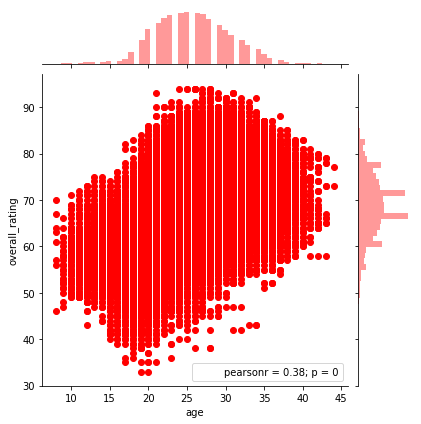

In [12]:
sns.jointplot(x=pa_filter.age, y=pa_filter.overall_rating, color='r')
plt.show()

As for the potential score, which has a little higher mean/mode value than overall_scoring as shown on the y-axis, has less to do with player's age. The Pearson's correlation coefficient is -0.11, although it is not very clear from the graph.

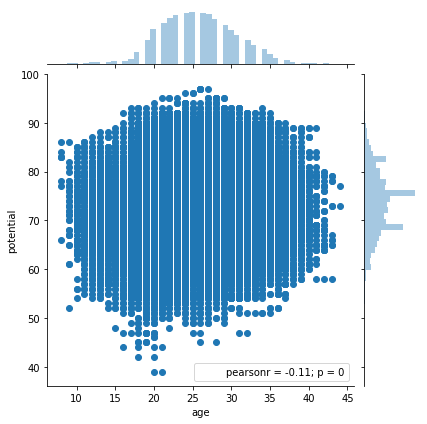

In [13]:
sns.jointplot(x=pa_filter.age, y=pa_filter.potential)
plt.show()

Then I combined two correlation groups together to compare the overall rating score with the potential score with respect to player's age data. I found that generally, the potential score is higher than the overall rating score, and the smaller the player's age is the difference seems larger. 

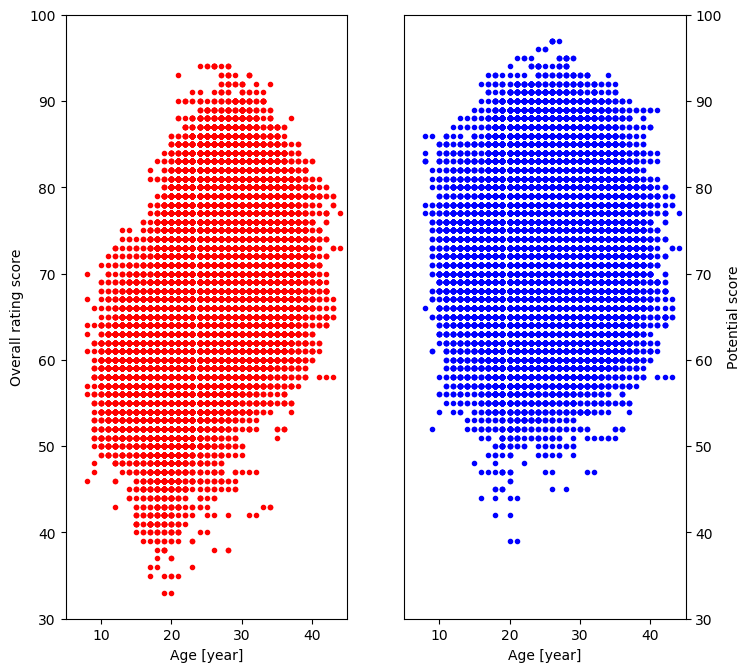

In [14]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_ylim(30,100)
ax1.set_xlim(5,45)
ax1.scatter(pa_filter.age, pa_filter.overall_rating, c='r', label='overall', marker='.', linewidths=1)
ax1.set_xlabel('Age [year]')
ax1.set_ylabel('Overall rating score')

ax2.set_ylim(30,100)
ax2.set_xlim(5,45)
ax2.scatter(pa_filter.age, pa_filter.potential, c='b', label='potential', marker='.', linewidths=1)
ax2.set_xlabel('Age [year]')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('Potential score')

plt.show()

Then I substracted the overall rating score from potential score to see how the difference relates to player's age. From the graph we could know that the difference seemed bigger in player with younger ages and as age increases the difference seemed smaller. 


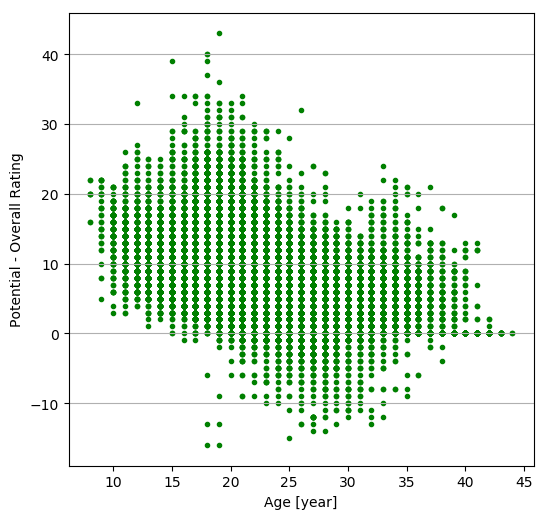

In [15]:
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(pa_filter.age, pa_filter.potential-pa_filter.overall_rating,marker='.', linewidths=1,color='g')
plt.xlabel('Age [year]')
plt.ylabel('Potential - Overall Rating')
plt.grid(axis='y')
plt.show()

However, the scatter plots above are not easy to see the difference of scores with respect to player's ages because both ages and scores are ordinal data and we could not know how many data points are in each plotted dot. So then I decided to plot the data using pointplot to show the mean score under each age category with error bars showing the variation in each age category.

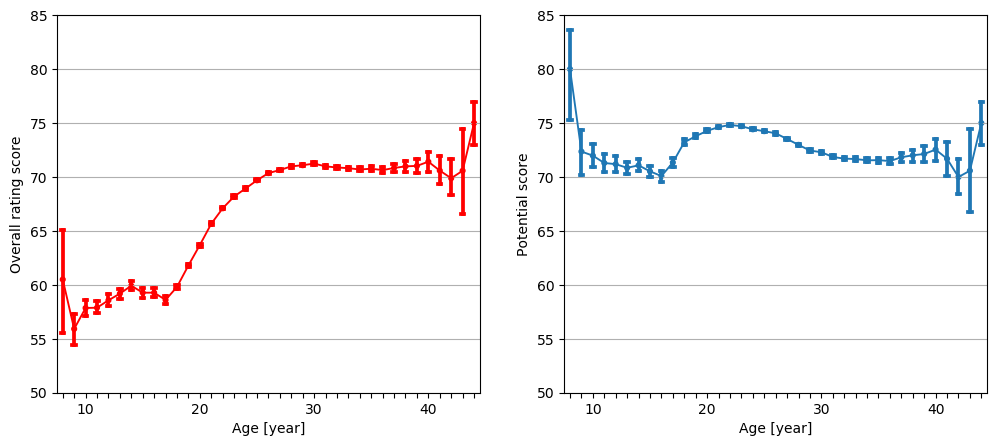

In [16]:
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(50,85)
g1=sns.pointplot(x="age", y="overall_rating", data=pa_filter, capsize=.3, scale=0.5, color='r')
ax1.set_xticklabels(['']*2+[x for y in [[x] + ['']* 9 for x in range(10,41,10)] for x in y]+['']*4)
ax1.set_xlabel('Age [year]')
ax1.set_ylabel('Overall rating score')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(50,85)
g2=sns.pointplot(x="age", y="potential", data=pa_filter, capsize=.3, scale=0.5)
ax2.set_xticklabels(['']*2+[x for y in [[x] + ['']* 9 for x in range(10,41,10)] for x in y]+['']*4)
ax2.set_xlabel('Age [year]')
ax2.set_ylabel('Potential score')
g2.grid(axis='y')

plt.show()

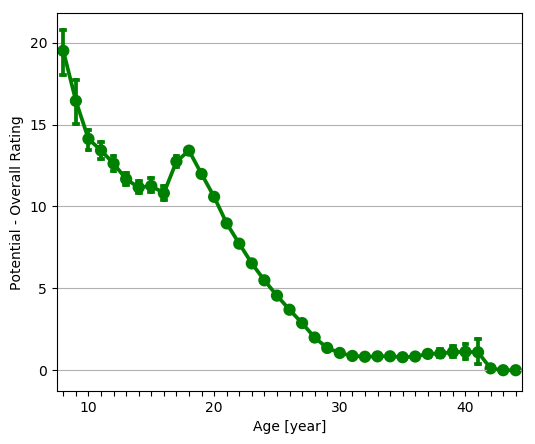

In [17]:
fig = plt.figure(figsize=(6,5), dpi=100)
g=sns.pointplot(pa_filter.age, pa_filter.potential-pa_filter.overall_rating,color='g', capsize=.3)
g.set_xticklabels(['']*2+[x for y in [[x] + ['']* 9 for x in range(10,41,10)] for x in y]+['']*4)
plt.grid(axis='y')
plt.ylabel('Potential - Overall Rating')
plt.xlabel('Age [year]')
plt.show()

<a id='q1_dis'></a>
The pointplot above showed the similar but clearer trend than the previous scatter plot. It is clear that the smaller player'age is the difference of potential scores to overall rating is bigger, which make sense because younger players usually have more potential while older players the potential-overall rating converges to about 1 from 31 years old and drops to zero after 42 years old. The error bars in the ages from 18 to 38 are really small compared to younger and older ages, partially because there are many more data points in the 18-38 age range. 

What is interesting is that although the general trend is that the difference decreases as age increases, in the 16-18 age range, the difference increases. Looking back to the individual graphs for overall rating and potential above, the overall rating scores does not change much for 16-18, which is around 60, but the potential scores increases from 70 to 73.5. This could probably mean that the potential score algorithm changes for players right before 18 because it is the time period that the players changing from high schools to colleges.

### Research Question 2

<a id='q2'></a>
#### *How do teams' play styles correlate with goals through all seasons?*

For this question I will use the **ta_filter** table cleaned before to see how teams' play styles correlate the average goals per game across all six seasons, in which **Team_Attributes** table has data.

This time I will only use the pointplot because it shows the trend more clearly and the error bar feature is good to see the variance in each group.

>1. Build Up Play Speed vs goals made and goals allowed (by oppose)

Nothing interesting found here.

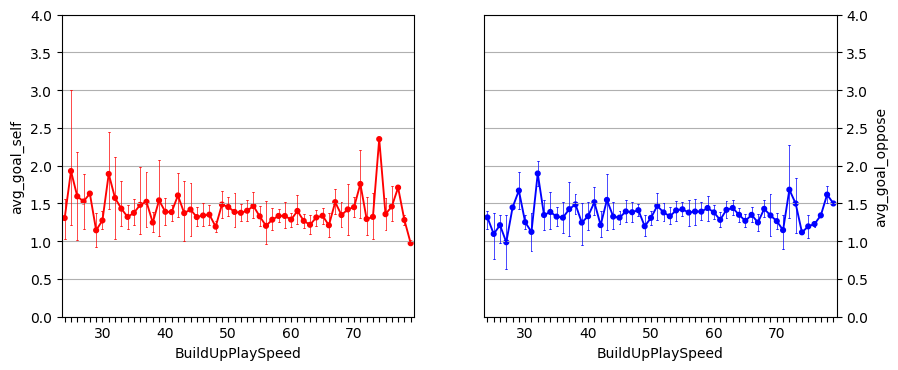

In [18]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="buildUpPlaySpeed", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 6+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 9
ax1.set_xticklabels(xticks)
ax1.set_xlabel('BuildUpPlaySpeed')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="buildUpPlaySpeed", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('BuildUpPlaySpeed')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>2. Build Up Play Passing vs goals made and goals allowed (by oppose)

***Negative trending for goals made and slightly positive trending for goals allowed.***

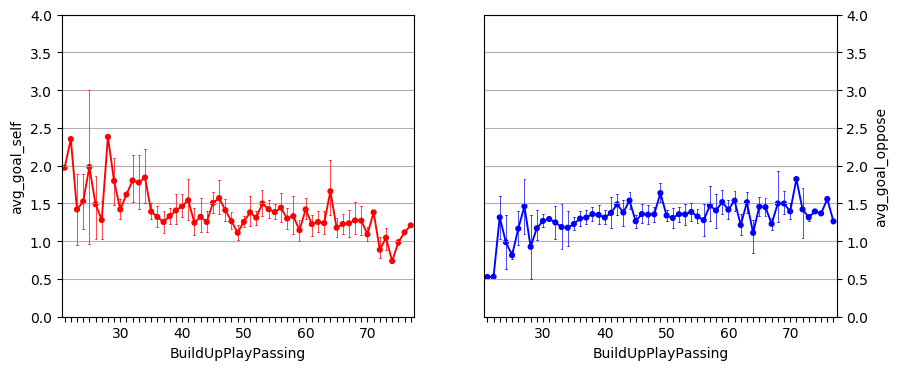

In [19]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="buildUpPlayPassing", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 9+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 7
ax1.set_xticklabels(xticks)
ax1.set_xlabel('BuildUpPlayPassing')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="buildUpPlayPassing", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('BuildUpPlayPassing')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>3. Chance creation by passing vs goals made and goals allowed (by oppose)

Nothing interesting found here.

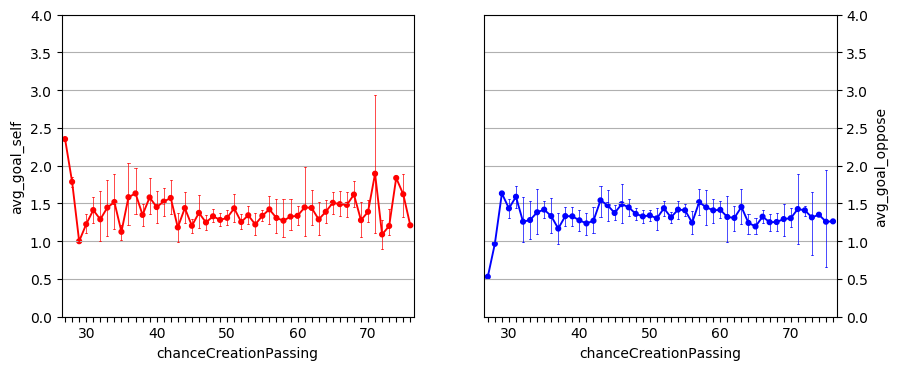

In [20]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="chanceCreationPassing", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 3+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 6
ax1.set_xticklabels(xticks)
ax1.set_xlabel('chanceCreationPassing')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="chanceCreationPassing", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('chanceCreationPassing')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>4. Chance creation by shooting vs goals made and goals allowed (by oppose)

Nothing interesting found here.

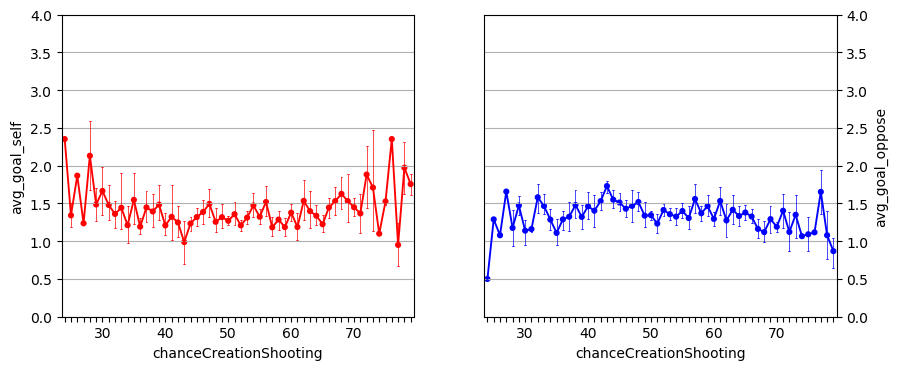

In [21]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="chanceCreationShooting", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 6+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 9
ax1.set_xticklabels(xticks)
ax1.set_xlabel('chanceCreationShooting')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="chanceCreationShooting", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('chanceCreationShooting')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>5. Defence pressure vs goals made and goals allowed (by oppose)

***Positive trending for goals made and negative trending for goals allowed.***

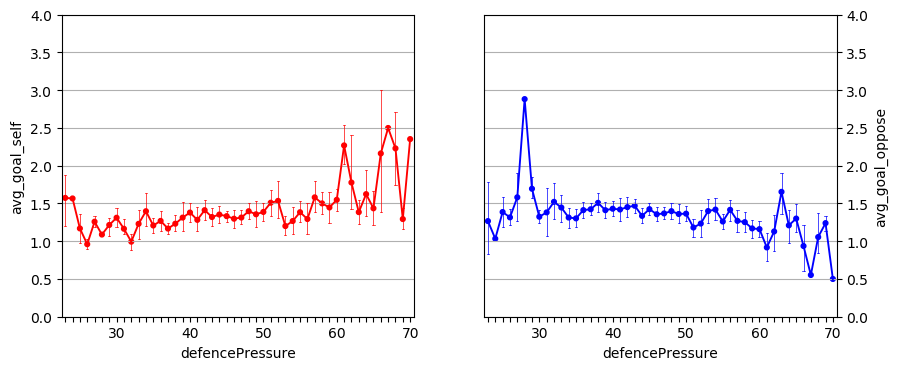

In [22]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="defencePressure", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 7+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 0
ax1.set_xticklabels(xticks)
ax1.set_xlabel('defencePressure')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="defencePressure", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('defencePressure')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>6. Defence aggression vs goals made and goals allowed (by oppose)

***Postive trending for goals made and negative trending for goals allowed.***

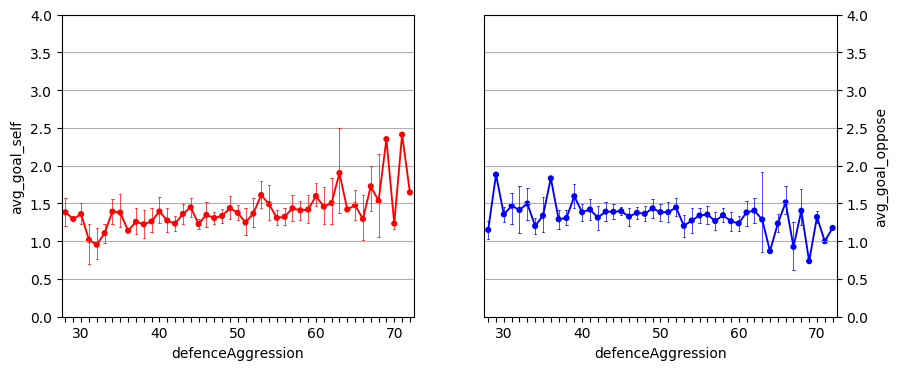

In [23]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="defenceAggression", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 2+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 2
ax1.set_xticklabels(xticks)
ax1.set_xlabel('defenceAggression')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="defenceAggression", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('defenceAggression')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>7. Defence team width by shooting vs goals made and goals allowed (by oppose)

Nothing interesting found here.

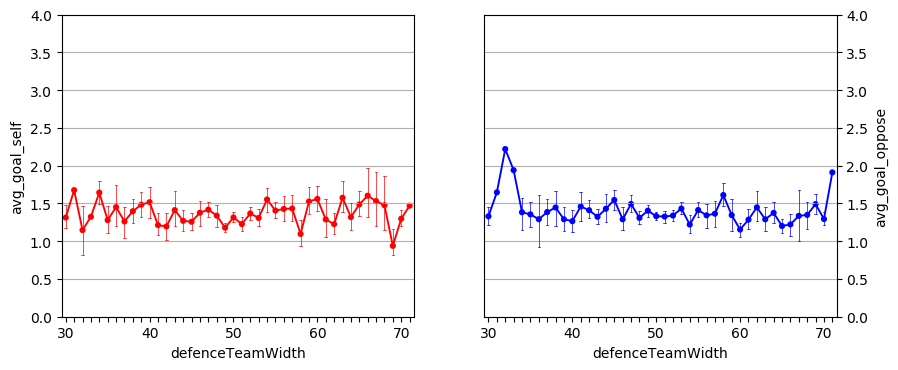

In [24]:
fig = plt.figure(figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(0,4)
g1=sns.pointplot(x="defenceTeamWidth", y="avg_goal_self", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='r')
xticks = ['']* 0+[x for y in [[x] + ['']* 9 for x in range(30,71,10)] for x in y]+['']* 1
ax1.set_xticklabels(xticks)
ax1.set_xlabel('defenceTeamWidth')
ax1.set_ylabel('avg_goal_self')
g1.grid(axis='y')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(0,4)
g2=sns.pointplot(x="defenceTeamWidth", y="avg_goal_oppose", data=ta_filter, capsize=.3, scale=0.5, errwidth=.5,color='blue')
ax2.set_xticklabels(xticks)
ax2.set_xlabel('defenceTeamWidth')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('avg_goal_oppose')
g2.grid(axis='y')

plt.show()

>In a nutshell, there are three parameters of team attributes that have some kind of trending with goals made or goals allowed, usually the trendings are opposite: BuildUpPlayPassing, DefencePressure, and DefenceAggression.

Then I want to investigate whether these three are truely significant trendings compare with others, so I used *scipy.stats.linregress* to find the p-value for each regression curve.

In [25]:
colmns = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationShooting',
          'defencePressure', 'defenceAggression','defenceTeamWidth']
pvalue = dict()
for col in colmns:
    ss,_,_,ps,_ = stat.linregress(ta_filter[col],ta_filter.avg_goal_self)
    so,_,_,po,_ = stat.linregress(ta_filter[col],ta_filter.avg_goal_oppose)
    pvalue[col]=[round(ss,5),round(ps,5),round(so,5), round(po,5)]
pvalue_df = pd.DataFrame.from_dict(pvalue,orient='index',columns=['slope_goal_self','pvalue_goal_self','slope_goal_oppose','pvalue_goal_oppose'])
pvalue_df

,slope_goal_self,pvalue_goal_self,slope_goal_oppose,pvalue_goal_oppose
buildUpPlaySpeed,-0.00036,0.74696,0.00048,0.59313
buildUpPlayPassing,-0.00727,0.00000,0.00434,0.00001
chanceCreationPassing,0.00214,0.09150,-0.00122,0.23289
chanceCreationShooting,0.00252,0.04540,-0.00399,0.00009
defencePressure,0.00816,0.00000,-0.00603,0.00000
defenceAggression,0.00390,0.00332,-0.00286,0.00761
defenceTeamWidth,0.00268,0.05240,-0.00306,0.00605


From the slope and pvalue table above, we noticed that for parameters buildUpPlayPassing, defencePressure and defenceAggression, the pvalues for both goals made and goals allowed are very small (all less than .01).

Meanwhile, some of the parameters also have a small pvalue, such as chanceCreationShooting's pvalues for goals made is .045 and for goals allowed is <.0001, defenceTeamWidth's pvalue for goals allowed is 0.006 while for goals made is 0.052.


<a id='conclusions'></a>
## Conclusions

I investigated two questions regarding the European Soccor dataset using the combination of **Player** table and **Player_Attribution** table for the first question, and **Team_Attribution** with **Match** table for the second question.


>For the first question, I used scatter plots and then point plots to show how players' ages correlate with the overall rating score, potential score and their differences (potential minus overall rating). The details of the conclusion and discussion could be found <a href="#q1_dis">here</a>. In general, the correlation is similar for overall rating and potential score, but potential score is higher in the small age range, which could be observed through the correlation graph for players' ages and differences. This actually makes sense because younger players are expected to have more potentials because they have more spaces to grow in terms of body maturety and gaming experiences. The interesting spike in the difference graph showed and possible algorithm changes toward the players with 16-18 years old, but the real reason has not been investigated.

>For the second question, I used point plots to show how teams' playing styles affected their goal performances throughout 6 seasons. After showing that there might be a significant correlation (either positive or negative) for playing styles like *buildUpPlayPassing*, *defencePressure*, and *defenceAggression* with goals made or goals allowed, I did linear regression analysis to see if the trends are statistically significant or not. In conclusion, if the significant level for pvalue is set to less than 0.05, then the significant style parameters for goals a team made are: *buildUpPlayPassing, chanceCreationShooting, defencePressure, defenceAggression*; and for goals a team allowed (made by opponent) are: *buildUpPlayPassing, chanceCreationShooting, defencePressure, defenceAggression*, and *defenceTeamWidth*. In these parameters, almost all are more the better. For example, for *defencePressure*, the slope for goals made is positive and for goals allowed is negative, which basicly means that the more aggressive playing style a team play during defence, the more goals the team could make and less goal the team could allow (lose).  
<br> However, there is one exception, which is the parameter *buildUpPlayPassing*. The trend for this parameter is opposite to others, which means the more passing in a team's build up, the less goals the team make and more goals allowed, which is clearly a bad thing for any team.  
<br>So if I could ever build a soccer team, I could let them focus on the defence more, either pressure of defence or the aggressiveness of defence, and create more chance in shooting and less passing.  
<br>Or I could just buy Ronaldos.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0